# 📂Cloning YOLOv5 GitHub Files

First and foremost, we are going to retrieve the GitHub repository files that we will be using for training our own custom pharmaceutical drug images dataset. We will also be installing some of the neccessary python libraries that we will be needing later on.

In [1]:
# Cloning YOLO github
!git clone https://github.com/ultralytics/yolov5
!pip install -r yolov5/requirements.txt
!pip install utilsds
!pip install pylabel > /dev/null

Cloning into 'yolov5'...
remote: Enumerating objects: 16522, done.
remote: Counting objects: 100% (120/120), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 16522 (delta 50), reused 52 (delta 16), pack-reused 16402
Receiving objects: 100% (16522/16522), 15.17 MiB | 30.64 MiB/s, done.
Resolving deltas: 100% (11307/11307), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 5.5 MB/s eta 0:00:00
ERROR: Ignored the following versions that require a different python version: 1.22.0 Requires-Python >=3.8; 1.22.1 Requires-Python >=3.8; 1.22.2 Requires-Python >=3.8; 1.22.3 Requires-Python >=3.8; 1.22.4 Requires-Python >=3.8; 1.23.0 Requires-Python >=3.8; 1.23.0rc1 Requires-Python >=3.8; 1.23.0rc2 Requires-Python >=3.8; 1.23.0rc3 Requires-Python >=3.8; 1.23.1 Requires-Python >=3.8; 1.23.2 Requires-Python >=3.8; 1.23.3 Requires-Python >=3.8; 1.23.4 Requires-Python >=3.8; 1.23.5 Requires-Python >=3.8; 1.24.0 Requires-Python >=3.8; 1.24.0rc1 Requires-Python >=3

Importing the Necessary Libraries

In [2]:
import torch
import os 
import random
import shutil
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt
import logging
import os 
import zipfile
import yaml
import PIL

from IPython.display import Image  # for displaying images
from sklearn.model_selection import train_test_split
from pylabel import importer
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw

logging.getLogger().setLevel(logging.CRITICAL)
random.seed(42)

Convert COCO JSON Annotations to YOLO TXT Files


In [3]:
from pylabel import importer

## Import COCO Annotations 


In [4]:
# Copy images_raw to working directory
!cp -r ../input/insect-village-synthetic-dataset/ImageClassesCombinedWithCOCOAnnotations/images_raw ./

In [5]:
# Copy annotations to working directory
!cp -r ../input/insect-village-synthetic-dataset/ImageClassesCombinedWithCOCOAnnotations/coco_instances.json ./

In [6]:
# Copy test image to output directory
!cp -r ../input/insect-village-synthetic-dataset/ImageClassesCombinedWithCOCOAnnotations/test_image.jpg ./

In [7]:
#Specify path to the coco.json file
path_to_annotations = r"./coco_instances.json"
#Specify the path to the images 
path_to_images = r"./images_raw"

#Import the dataset into the pylable schema 
dataset = importer.ImportCoco(path_to_annotations, path_to_images=path_to_images, name="BCCD_coco")
dataset.df.head(5)

img_folder  img_filename img_path  img_id  img_width  img_height  \
id                                                                       
0   ./images_raw  00000000.jpg                0        300         300   
1   ./images_raw  00000001.jpg                1        300         300   
2   ./images_raw  00000002.jpg                2        300         300   
3   ./images_raw  00000002.jpg                2        300         300   
4   ./images_raw  00000002.jpg                2        300         300   

   img_depth ann_segmented  ann_bbox_xmin  ann_bbox_ymin  ...  ann_iscrowd  \
id                                                        ...                
0                                   104.5          114.5  ...            0   
1                                    74.5           49.5  ...            0   
2                                    67.5           87.5  ...            0   
3                                   128.5          119.0  ...            0   
4                                   162.5           84.5  ...            0   

    ann_keypoints  ann_pose  ann_truncated  ann_difficult cat_id   cat_name  \
id                                                                            
0                                                              4  dragonfly   
1                                                              7   scorpion   
2                                                              3     cicada   
3                                                              6      snail   
4                                                             10     beetle   

   cat_supercategory split annotated  
id                                    
0             insect               1  
1             insect               1  
2             insect               1  
3             insect               1  
4             insect               1  

[5 rows x 26 columns]

# Analyze annotations


In [8]:
print(f"Number of images: {dataset.analyze.num_images}")
print(f"Number of classes: {dataset.analyze.num_classes}")
print(f"Classes:{dataset.analyze.classes}")
print(f"Class counts:\n{dataset.analyze.class_counts}")
print(f"Path to annotations:\n{dataset.path_to_annotations}")


Number of images: 15000
Number of classes: 10
Classes:['grasshoppers', 'butterfly', 'cicada', 'dragonfly', 'spider', 'snail', 'scorpion', 'bees', 'moth', 'beetle']
Class counts:
grasshoppers    3043
dragonfly       3042
beetle          3028
butterfly       3014
spider          3010
cicada          3004
snail           2973
scorpion        2954
bees            2951
moth            2928
Name: cat_name, dtype: int64
Path to annotations:
.


## Visualize Annotations 
You can render the bounding boxes for your image to inspect them and confirm that they imported correctly.  

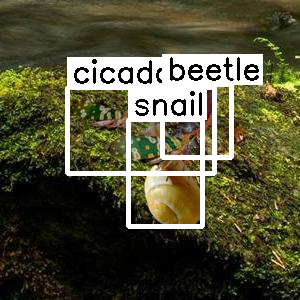

In [9]:
try:
    display(dataset.visualize.ShowBoundingBoxes(2))
    display(dataset.visualize.ShowBoundingBoxes("./images_raw/00000002.jpg"))
except:
    pass

## Export to YOLOv9 Format
The PyLabel exporter will export all of the annotations in the dataframe to the desired target format.
Yolo creates one text file for each image in the dataset. Looking at the directory file, you will now see a folder named `yolo` which contains the extracted label from the COCO JSON format as well as a `dataset.yaml` file. 

In [10]:
# This cell may take some time depending on the size of the dataset.
dataset.path_to_annotations = "labels"
dataset.export.ExportToYoloV5(output_path='text_files');

Exporting YOLO files...: 100%|██████████| 15000/15000 [01:40<00:00, 149.45it/s]


After the code cell successfully ran, you may check the output folder and confirm that there is a labels folder contatining the text files of the bbox of every images.

# Adjust Annotation Labels



In [11]:

path = './text_files' #path of labels
labels = os.listdir(path)
for x in labels:
    lines = list()
    with open(path+"/"+x, "r+") as f:
        for line in f.read().splitlines():
            split_line = line.split(" ")  # split on space character (and remove newline characters as well)
            split_line[0] = str(
              int(split_line[0]) - 1)  # update the value inside the loop. the loop used in later not needed.
            lines.append(split_line)  # add split list into list of lines

    with open(path+"/"+x, 'w') as file:  # rewrite to file
        for line in lines:
            write_me = ' '.join(line)  # Use join method to add the element together
            file.write(write_me + "\n")


# ✂️Splitting the Dataset

In this section, we will be splitting the dataset into three categories: Train, Validation, Testing Dataset. We will use the train dataset for training the model, validation to test the model during runtime, and finally the test dataset to evaluate the model.

In [12]:
# Read images and annotations
image_dir = r'./images_raw'
images = [os.path.join(image_dir, x) for x in os.listdir(image_dir)]
annotations = [os.path.join('./text_files', x) for x in os.listdir('./text_files') if x[-3:] == "txt"]

images.sort()
annotations.sort()

# Split the dataset into train-valid-test splits 
train_images, val_images, train_annotations, val_annotations = train_test_split(images, annotations, test_size = 0.2, random_state = 1)
val_images, test_images, val_annotations, test_annotations = train_test_split(val_images, val_annotations, test_size = 0.5, random_state = 1)

In [13]:
len(train_images),len(train_annotations)
len(val_images)

1500

# 🗄️Format Directories

At this stage, we are going to reformat, move, and rename directories according to what is specified in the documnetation of YOLOv5. See this [link](https://blog.paperspace.com/train-yolov5-custom-data/) for more information regarding this.


In [14]:
!mkdir images
!mkdir annotations
!mkdir images/train images/val images/test annotations/train annotations/val annotations/test

In [15]:
#Utility function to move images 
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.move(f, destination_folder)
        except:
            print(f)
            assert False

# Move the splits into their folders
move_files_to_folder(train_images, 'images/train')
move_files_to_folder(val_images, 'images/val/')
move_files_to_folder(test_images, 'images/test/')
move_files_to_folder(train_annotations, 'annotations/train/')
move_files_to_folder(val_annotations, 'annotations/val/')
move_files_to_folder(test_annotations, 'annotations/test/')

In [16]:
!mv annotations labels

Move images folder inside the yolov5 directory

In [17]:
shutil.move("./images", "./yolov5")

'./yolov5/images'

Move labels folder inside the yolov5 directory

In [18]:
shutil.move("./labels", "./yolov5")

'./yolov5/labels'

# 📰Adjusting the dataset.yaml file

* `path`: images
* `train`: train
* `val`: val
* `test`: test



In [19]:
# Viewing the original unprocessed yaml file

yaml_params = {}
with open(r'dataset.yaml') as file:
    # The FullLoader parameter handles the conversion from YAML
    # scalar values to Python the dictionary format
    yaml_file_list = yaml.load(file, Loader=yaml.FullLoader)
    yaml_params = yaml_file_list
    print(yaml_file_list)

{'names': ['grasshoppers', 'butterfly', 'cicada', 'dragonfly', 'spider', 'snail', 'scorpion', 'bees', 'moth', 'beetle'], 'nc': 10, 'path': '..', 'train': 'images', 'val': 'images'}


In [20]:
# Adjusting the parameters of the yaml file
yaml_params['path'] = 'images'
yaml_params['train'] = 'train'
yaml_params['val'] = 'val'
yaml_params['test'] = 'test'
yaml_params

{'names': ['grasshoppers',
  'butterfly',
  'cicada',
  'dragonfly',
  'spider',
  'snail',
  'scorpion',
  'bees',
  'moth',
  'beetle'],
 'nc': 10,
 'path': 'images',
 'train': 'train',
 'val': 'val',
 'test': 'test'}

In [21]:
# Overwriting the new params from the previous ones.
with open(r'dataset.yaml', 'w') as file:
    documents = yaml.dump(yaml_params, file)

You should double check that the dataset.yaml file has been adjusted to fit the abovementioned requirements.

In [22]:
# Moving the dataset.yaml inside the yolov5/data folder.
shutil.move("dataset.yaml", "yolov5/data")

'yolov5/data/dataset.yaml'

In [23]:
shutil.move("./test_image.jpg", "./yolov5")

'./yolov5/test_image.jpg'

# 🤹‍♂️Training the Custom Dataset using YOLOv9

Now, we train the network. We use various flags to set options regarding training.

* **img:** Size of image. The image is a square one. The original image is resized while maintaining the aspect ratio. The longer side of the image is resized to this number. The shorter side is padded with grey color. In our case the image size would be `300px`.
* **batch:** The batch size which will be 32
* **epochs:** Number of epochs to train for. In our case, we are just hoing to train it with 20 epochs to not make it too long. You may ajdust this to your own use case.
* **data:** Data YAML file that contains information about the dataset (path of images, labels)
* **workers:** Number of CPU workers '
* **name:** Various things about training such as train logs. Training weights would be stored in a folder named runs/train/name
* **hyp:** YAML file that describes hyperparameter choices. For examples of how to define hyperparameters, see data/hyp.scratch.yaml. If unspecified, the file data/hyp.scratch.yaml is used.

In [24]:
# Change the current directory inisde the yolov5
%cd ./yolov5

/kaggle/working/yolov5


## Training using YOLOv5

In [25]:
!python train.py --img 300 --cfg yolov5s.yaml --hyp hyp.scratch-low.yaml --batch 32 --epochs 20 --data dataset.yaml --weights yolov5s.pt --workers 24 --name yolo_insect_det

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 616.7/616.7 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 614.9/614.9 kB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 614.4/614.4 kB 40.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 606.9/606.9 kB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 606.2/606.2 kB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.5/605.5 kB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.6/605.6 kB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 19.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.5.4.60
    Uninstalling opencv-python-4.5.4.60:
      Successfully uninstalled opencv-python-4.5.4.60
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wa

# ✔️Running Inferenece on the Test Data

There are many ways to run inference using the detect.py file.

The source flag defines the source of our detector, which can be:

* A single image
* A folder of images
* Video
* Webcam

...and various other formats. We want to run it over our test images so we set the source flag to .. yolov5/images/test.

The weights flag defines the path of the model which we want to run our detector with.
conf flag is the thresholding objectness confidence.
name flag defines where the detections are stored. We set this flag to yolo_road_det; therefore, the detections would be stored in runs/detect/yolo__det/.
With all options decided, let us run inference over our test dataset.

In [26]:
!python detect.py --source images/test --weights runs/train/yolo_insect_det/weights/best.pt --conf 0.25 --name yolo_insect_det

detect: weights=['runs/train/yolo_insect_det/weights/best.pt'], source=images/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=yolo_insect_det, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7037095 parameters, 0 gradients, 15.8 GFLOPs
image 1/1500 /kaggle/working/yolov5/images/test/00000005.jpg: 640x640 1 butterfly, 1 moth, 7.0ms
image 2/1500 /kaggle/working/yolov5/images/test/00000006.jpg: 640x640 1 butterfly, 1 spider, 7.1ms
image 3/1500 /kaggle/working/yolov5/images/test/00000007.jpg: 640x640 1 butterfly, 1 scorpion, 7.0ms
image 4/

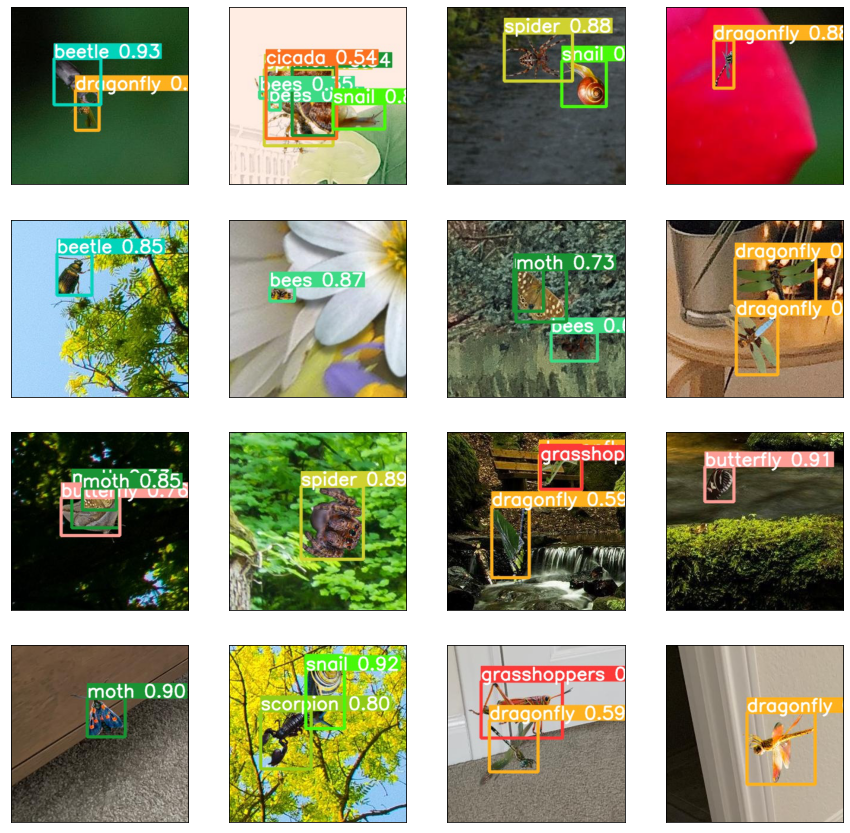

In [27]:
detections_dir = "runs/detect/yolo_insect_det/"
detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    random_detection_image = PIL.Image.open(random.choice(detection_images))
    ax.imshow(random_detection_image)


# 🔮Predict on our own Test Image

In [28]:

!python detect.py --source ./test_image.jpg --weights runs/train/yolo_insect_det/weights/best.pt --conf 0.25 --name yolo_insect_det

detect: weights=['runs/train/yolo_insect_det/weights/best.pt'], source=./test_image.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=yolo_insect_det, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7037095 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /kaggle/working/yolov5/test_image.jpg: 512x640 3 grasshopperss, 3 butterflys, 4 cicadas, 4 dragonflys, 4 spiders, 1 snail, 2 scorpions, 1 bees, 3 beetles, 12.9ms
Speed: 0.5ms pre-process, 12.9ms inference, 1.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/yolo_inse

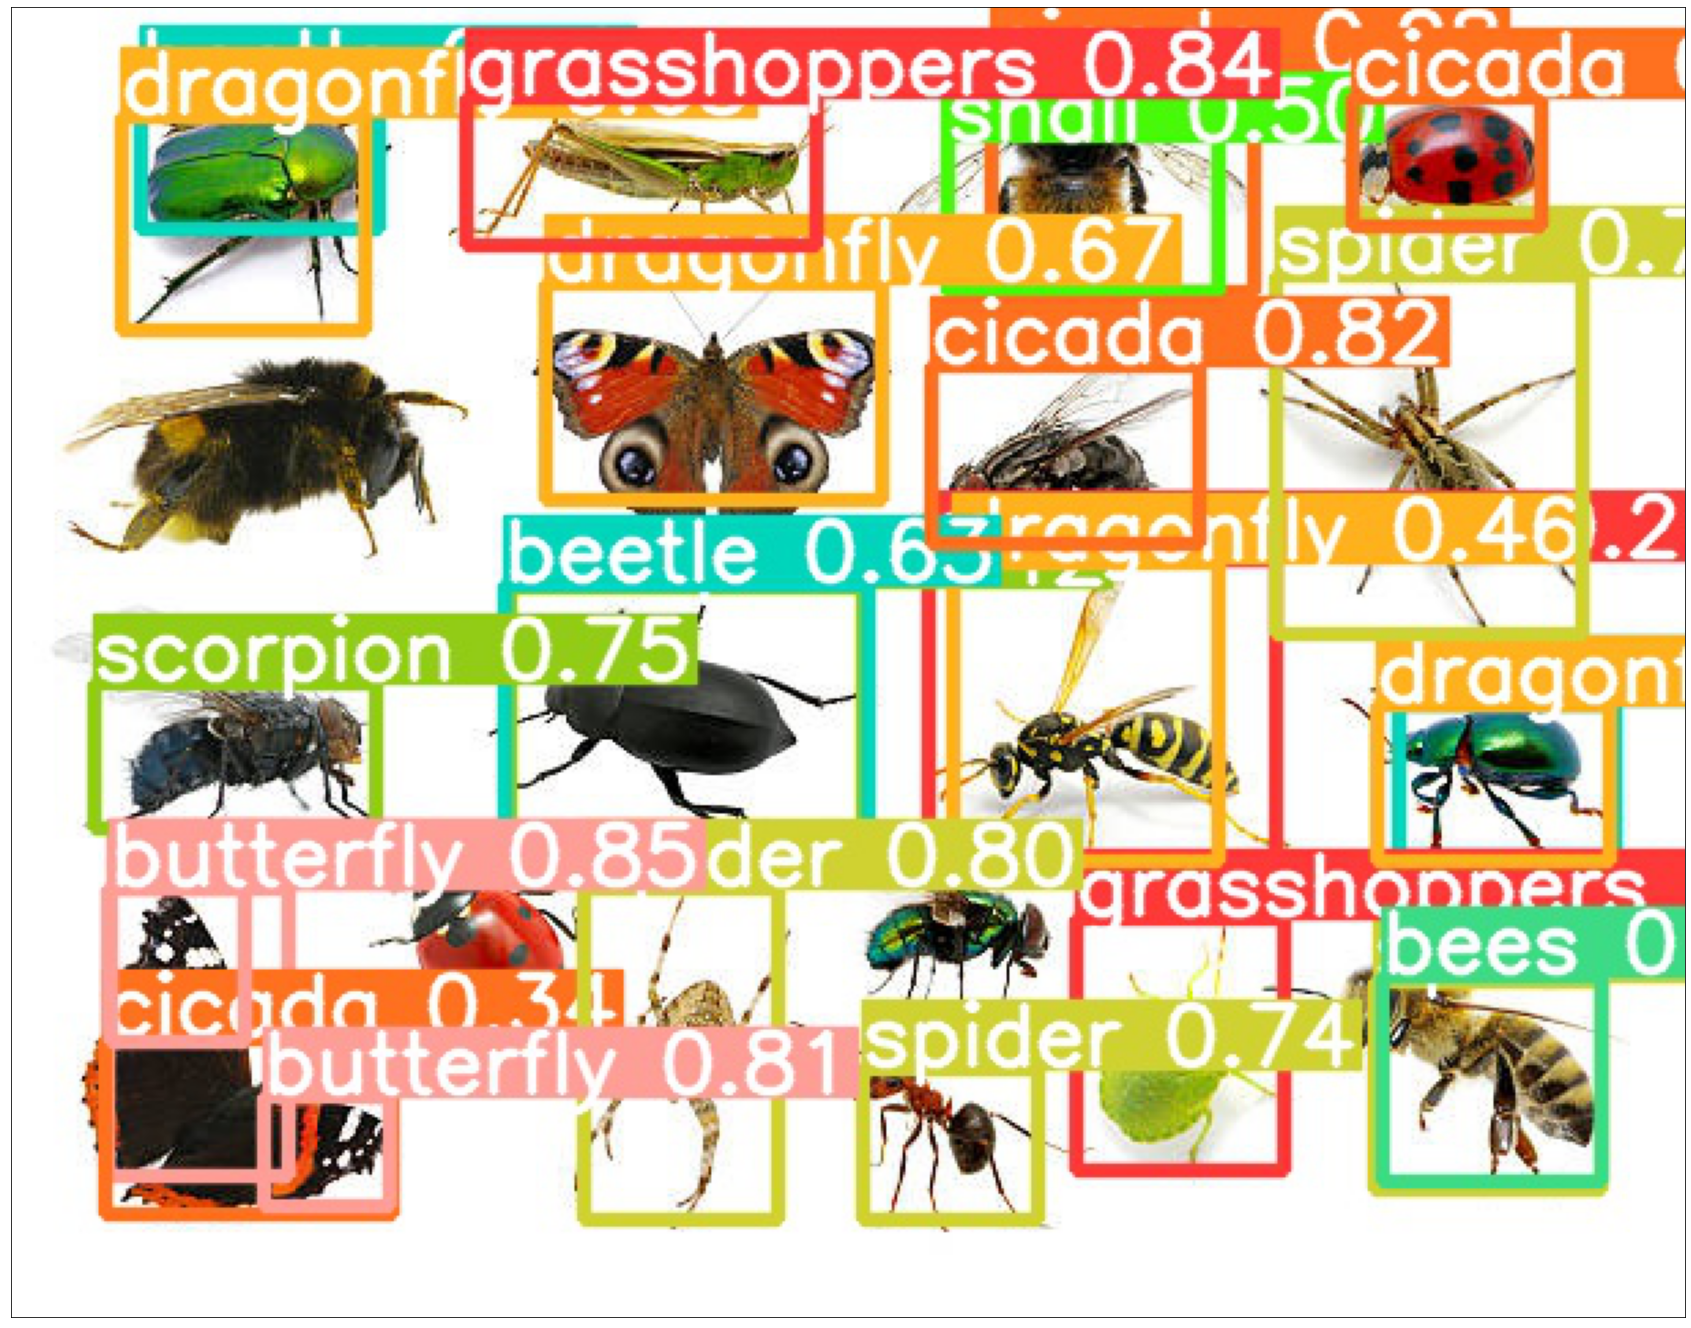

In [29]:
detections_dir = "runs/detect/yolo_insect_det2/"
detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]
random_detection_image = PIL.Image.open(random.choice(detection_images))
plt.figure(figsize=(30,30));
plt.imshow(random_detection_image)
plt.xticks([])
plt.yticks([]);